In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5002/data/Data_Q6/Bank_Customer.csv')

In [ ]:
data

,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2002/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2018/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2018/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2018/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2018/9/16,184706,1000.0


In [ ]:
data.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDateOfBirth        3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [ ]:
# Handling Missing Values
# For numerical features, fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
data['CustAccountBalance'] = imputer.fit_transform(data[['CustAccountBalance']])

# For categorical features, fill missing values with the mode
imputer_mode = SimpleImputer(strategy='most_frequent')
data['CustGender'] = imputer_mode.fit_transform(data[['CustGender']])
data['CustLocation'] = imputer_mode.fit_transform(data[['CustLocation']])

In [ ]:
data.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDateOfBirth        3397
CustGender                    0
CustLocation                  0
CustAccountBalance            0
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [ ]:
data = data.dropna(subset=['CustomerDateOfBirth'])
len(data)

1045170

In [ ]:
from datetime import datetime
def calculate_age(dob):
    try:
        # Split the date string
        day, month, year = map(int, dob.split('/'))

        # Parse the year
        if 0 <= year <= 23:
            year += 2000
        elif 24 <= year <= 99:
            year += 1900
        else:
            #print(year)  Suspected input issue for '1/1/1800'
            return -1  # Return -1 if the year is not within the expected range

        # Construct the complete date object
        dob = datetime(day=day, month=month, year=year)
    except ValueError:
        return -1

    today = datetime.today()

    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

data['Age'] = data['CustomerDateOfBirth'].apply(calculate_age)

# Remove dates that couldn't be parsed
data = data[data['Age'] != -1]

<ipython-input-7-8b7de4d256b0>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['CustomerDateOfBirth'].apply(calculate_age)


In [ ]:
data

,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0,29
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0,66
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0,27
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0,50
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2002/8/16,181156,1762.5,35
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2018/9/16,184824,799.0,33
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2018/9/16,183734,460.0,31
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2018/9/16,183313,770.0,34
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2018/9/16,184706,1000.0,45


In [ ]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print()

Value counts for column 'TransactionID':
T1          1
T700014     1
T699916     1
T699917     1
T699918     1
           ..
T348979     1
T348980     1
T348981     1
T348982     1
T1048567    1
Name: TransactionID, Length: 986874, dtype: int64

Value counts for column 'CustomerID':
C1736254    6
C1026833    6
C6735477    6
C6222360    6
C6624352    6
           ..
C8621487    1
C1836533    1
C8315781    1
C2141092    1
C6420483    1
Name: CustomerID, Length: 840208, dtype: int64

Value counts for column 'CustomerDateOfBirth':
1/1/89      809
1/1/90      784
6/8/91      699
1/1/91      666
1/1/92      633
           ... 
14/5/99       1
9/2/40        1
16/7/43       1
25/7/42       1
24/10/44      1
Name: CustomerDateOfBirth, Length: 16996, dtype: int64

Value counts for column 'CustGender':
M    713647
F    273227
Name: CustGender, dtype: int64

Value counts for column 'CustLocation':
MUMBAI                    98128
BANGALORE                 77806
NEW DELHI                 76403
GURGA

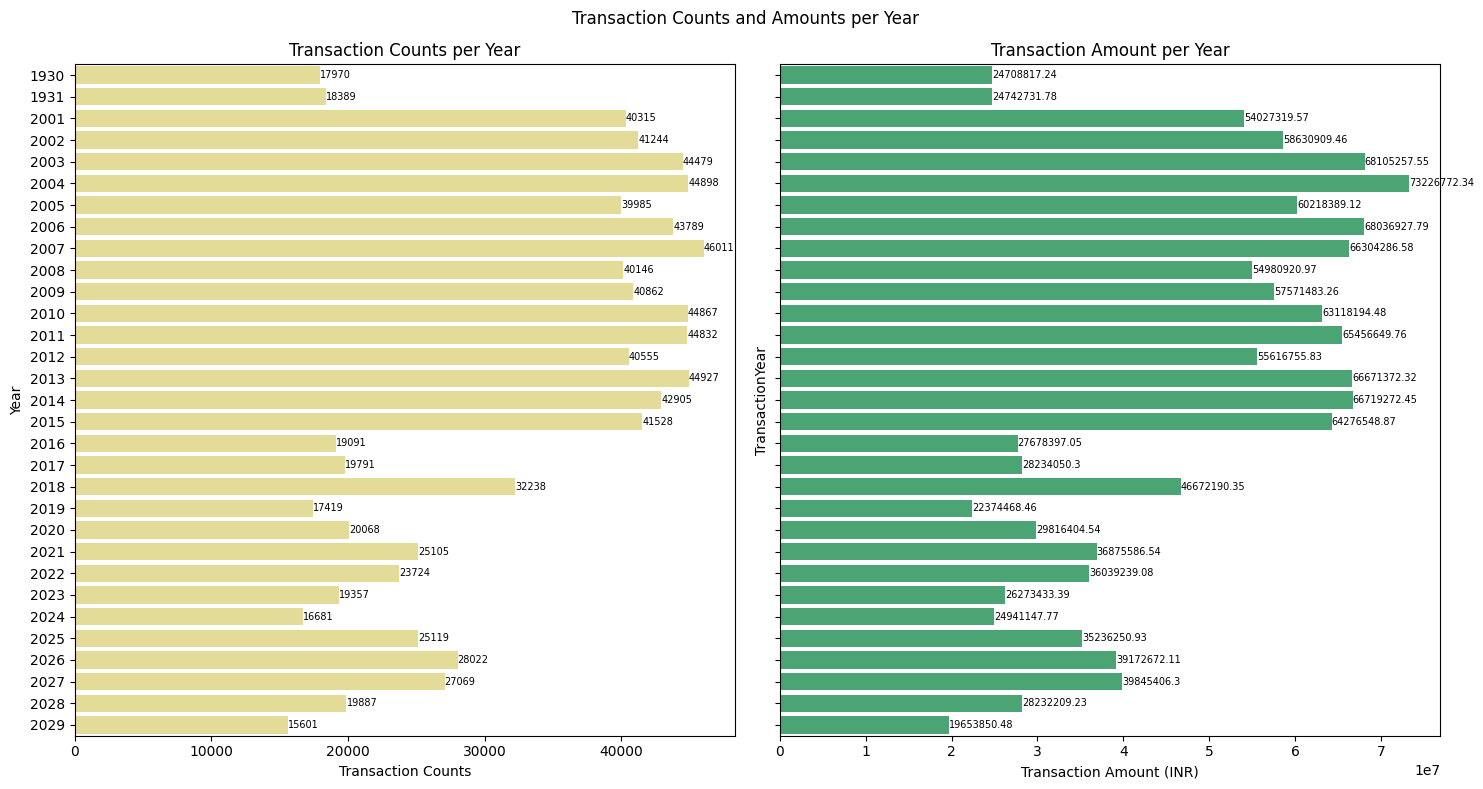

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data['TransactionYear'] = pd.to_datetime(data['TransactionDate']).dt.year
yearly_counts = data['TransactionYear'].value_counts().sort_index()
yearly_amount = data.groupby('TransactionYear')['TransactionAmount (INR)'].sum()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# First subplot: Bar plot of transaction counts
sns.barplot(x=yearly_counts.values, y=yearly_counts.index, ax=ax1, orient='h', color='#F0E68C')
ax1.set_xlabel('Transaction Counts')
ax1.set_ylabel('Year')
ax1.set_title('Transaction Counts per Year')

# Add transaction count labels
for index, value in enumerate(yearly_counts.values):
    ax1.text(value, index, str(value), ha='left', va='center', fontsize=7)

# Second subplot: Bar plot of transaction amounts
sns.barplot(x=yearly_amount.values, y=yearly_amount.index, ax=ax2, orient='h', color='#3CB371')
ax2.set_xlabel('Transaction Amount (INR)')
ax2.set_title('Transaction Amount per Year')

# Add transaction amount labels
for index, value in enumerate(yearly_amount.values):
    ax2.text(value, index, str(value), ha='left', va='center', fontsize=7)

# Add a suptitle
plt.suptitle('Transaction Counts and Amounts per Year')

plt.tight_layout()
plt.show()

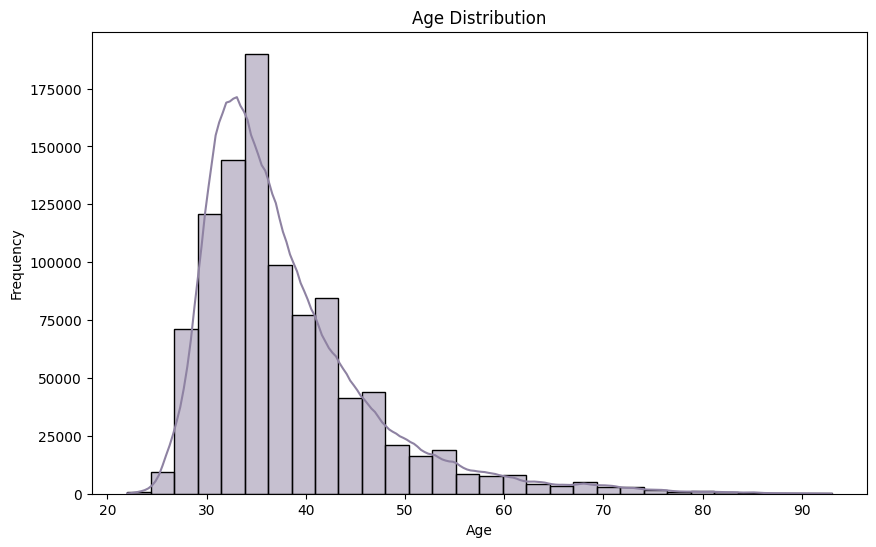

In [ ]:
#Age Distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

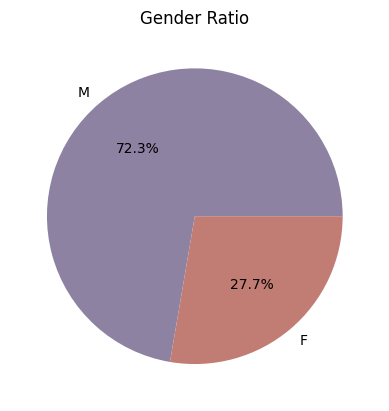

In [ ]:
# Gender Ratio
plt.pie(data['CustGender'].value_counts(), labels=data['CustGender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.show()

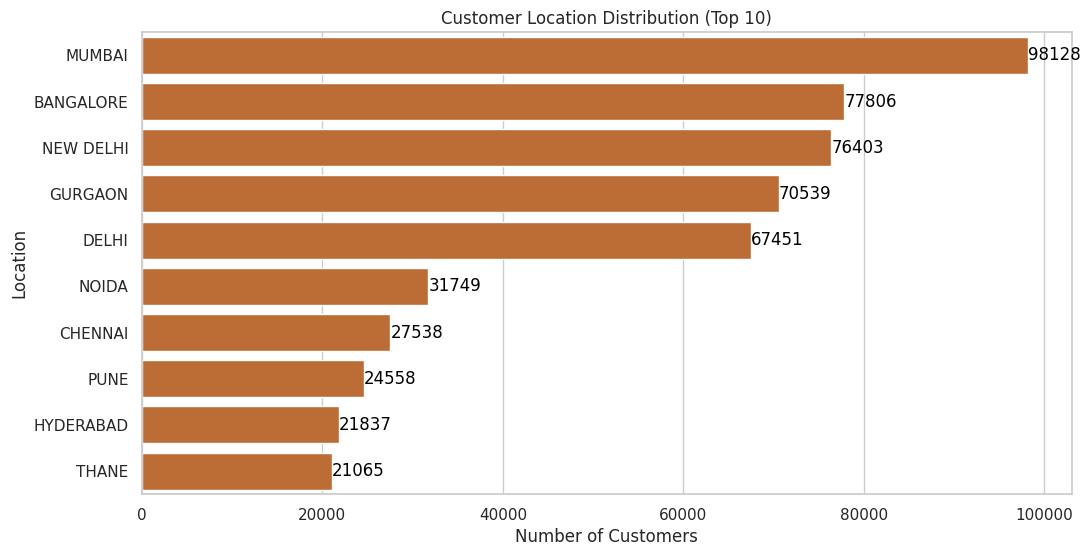

In [ ]:
# Get the top 10 most common locations
top_locations = data['CustLocation'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, color='#D2691E')
plt.title('Customer Location Distribution (Top 10)')
plt.xlabel('Number of Customers')
plt.ylabel('Location')

# Display the specific values on the y-axis
for i, v in enumerate(top_locations.values):
    plt.text(v + 3, i, str(v), color='black', ha='left', va='center')

plt.show()

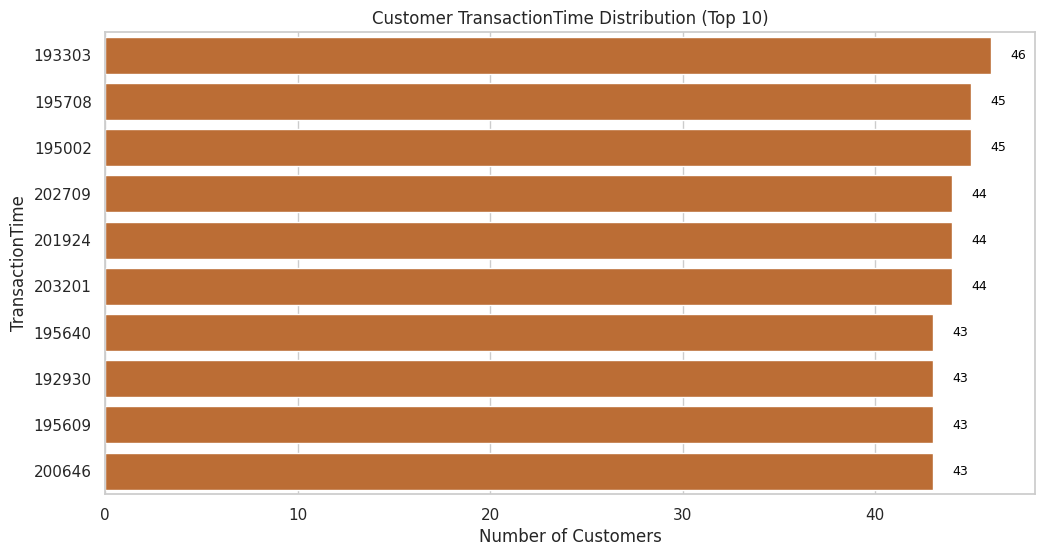

In [ ]:
#top10 most common transaction times and sort them by the number of customers
top_TransactionTime = data['TransactionTime'].value_counts().head(10).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=top_TransactionTime.values, y=top_TransactionTime.index, color='#D2691E', orient='h',
            order=top_TransactionTime.index)
plt.title('Customer TransactionTime Distribution (Top 10)')
plt.xlabel('Number of Customers')
plt.ylabel('TransactionTime')
# Display the specific values on the y-axis
for i, v in enumerate(top_TransactionTime.values):
    plt.text(v+1 , i, str(v), color='black', ha='left', va='center', fontsize=9)
plt.show()

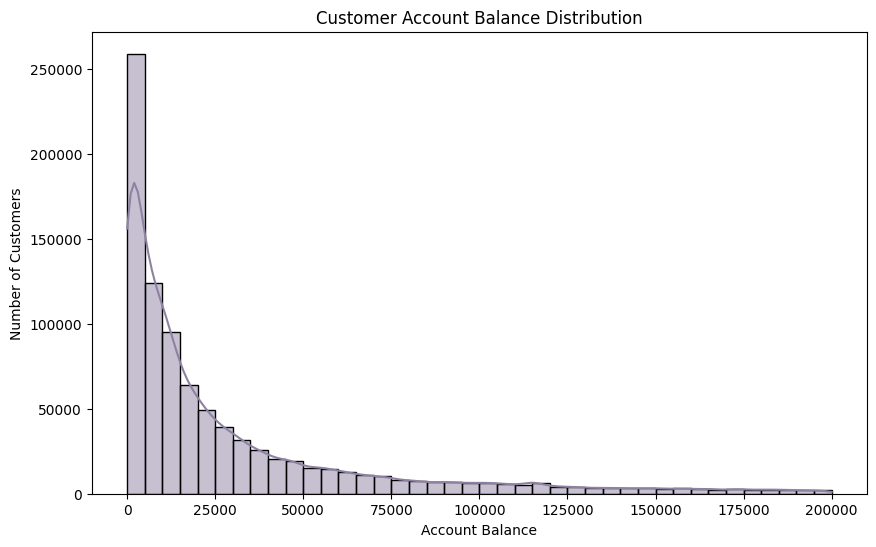

In [ ]:
#Customer Account Balance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['CustAccountBalance'] < 200000]['CustAccountBalance'], bins=40, kde=True)
plt.title('Customer Account Balance Distribution')
plt.xlabel('Account Balance')
plt.ylabel('Number of Customers')
plt.show()

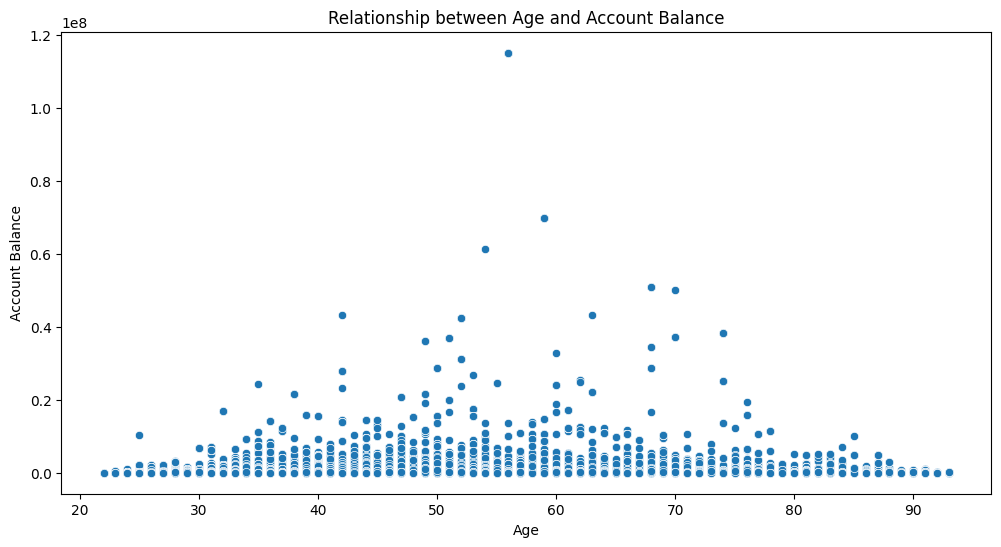

In [ ]:
#Relationship between Age and Account Balance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='CustAccountBalance', data=data)
plt.title('Relationship between Age and Account Balance')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.show()

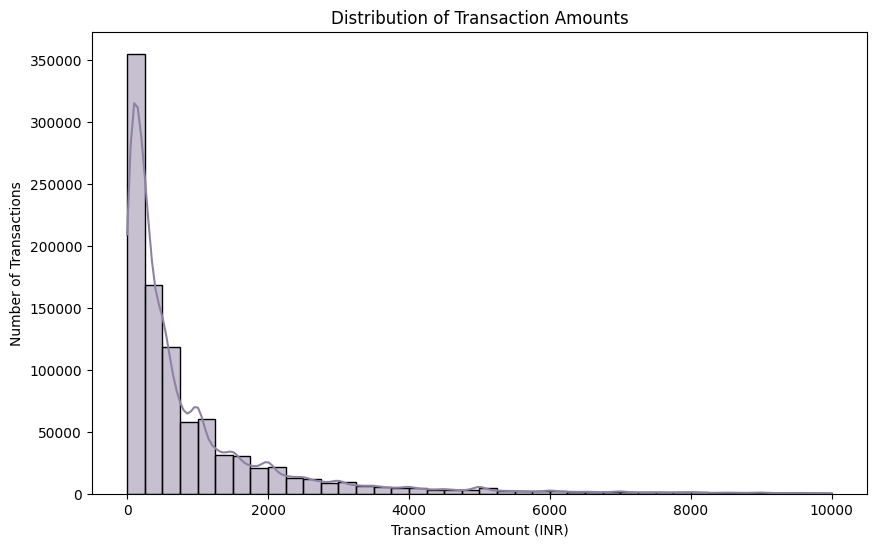

In [ ]:
#Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(data[data['TransactionAmount (INR)'] < 10000]['TransactionAmount (INR)'], bins=40, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Number of Transactions')
plt.show()

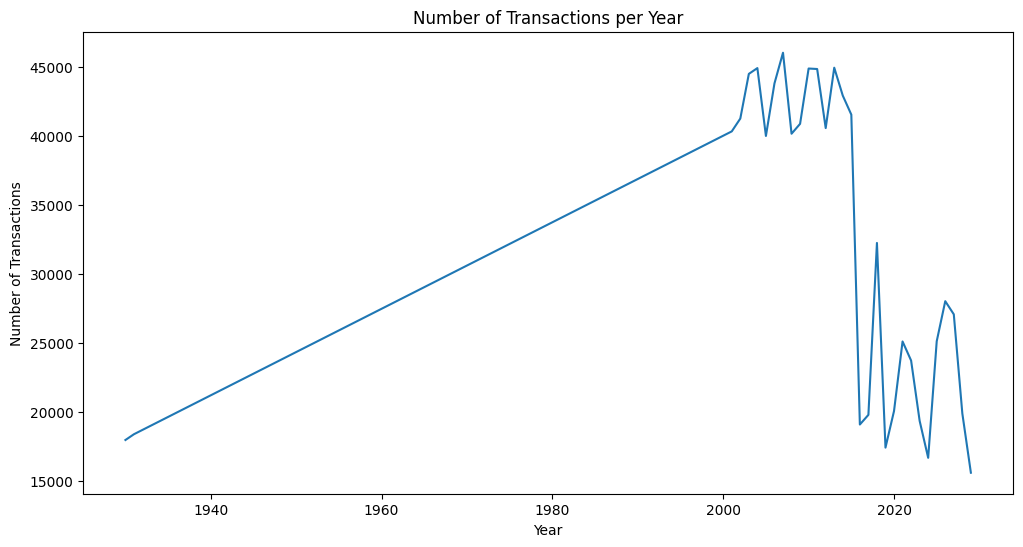

In [ ]:
#the frequency of transactions over time
data['TransactionYear'] = pd.to_datetime(data['TransactionDate']).dt.year
transactions_by_year = data['TransactionYear'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=transactions_by_year.index, y=transactions_by_year.values)
plt.title('Number of Transactions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
data

,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionYear
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0,29,2002
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0,66,2002
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0,27,2002
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0,50,2002
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2002/8/16,181156,1762.5,35,2002
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2018/9/16,184824,799.0,33,2018
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2018/9/16,183734,460.0,31,2018
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2018/9/16,183313,770.0,34,2018
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2018/9/16,184706,1000.0,45,2018


In [ ]:
customer_transactions = data.groupby('CustomerID').agg({'TransactionID': 'count', 'TransactionAmount (INR)': 'sum'})
data = data.merge(customer_transactions, on='CustomerID', suffixes=('', '_total'))
data

,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionYear,TransactionID_total,TransactionAmount (INR)_total
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0,29,2002,1,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0,66,2002,1,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0,27,2002,1,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0,50,2002,2,2938.4
4,T391139,C5342380,29/5/79,M,MUMBAI,3195.78,2013/8/16,194148,878.4,44,2013,2,2938.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986869,T1048561,C5028150,24/5/80,M,PUNE,464.87,2018/9/16,184632,3000.0,43,2018,1,3000.0
986870,T1048562,C1034220,19/11/92,M,BANGALORE,1212.70,2018/9/16,184734,1500.0,31,2018,1,1500.0
986871,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2018/9/16,184824,799.0,33,2018,1,799.0
986872,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2018/9/16,183734,460.0,31,2018,1,460.0


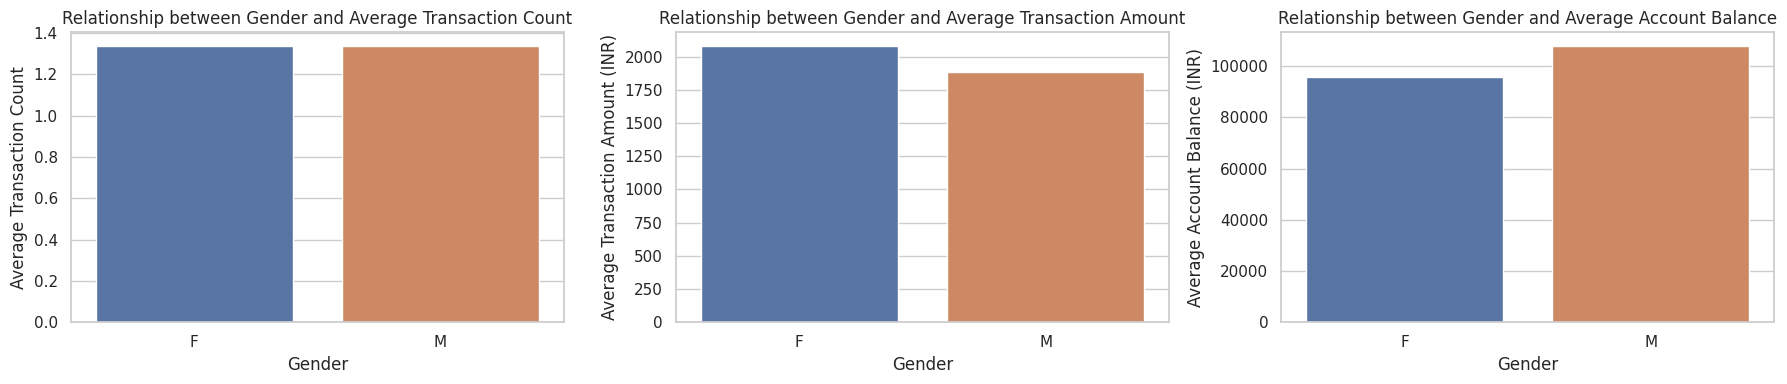

In [ ]:
# Calculate the average transaction count, average transaction amount, and average account balance for different genders
gender_stats = data.groupby('CustGender').agg({'TransactionID_total': 'mean', 'TransactionAmount (INR)_total': 'mean', 'CustAccountBalance': 'mean'}).reset_index()

# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(18,4))

# Plot 1: Average transaction count
sns.barplot(x='CustGender', y='TransactionID_total', data=gender_stats, ax=ax[0])
ax[0].set_title('Relationship between Gender and Average Transaction Count')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Average Transaction Count')

# Plot 2: Average transaction amount
sns.barplot(x='CustGender', y='TransactionAmount (INR)_total', data=gender_stats, ax=ax[1])
ax[1].set_title('Relationship between Gender and Average Transaction Amount')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Average Transaction Amount (INR)')

# Plot 3: Average account balance
sns.barplot(x='CustGender', y='CustAccountBalance', data=gender_stats, ax=ax[2])
ax[2].set_title('Relationship between Gender and Average Account Balance')
ax[2].set_xlabel('Gender')
ax[2].set_ylabel('Average Account Balance (INR)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

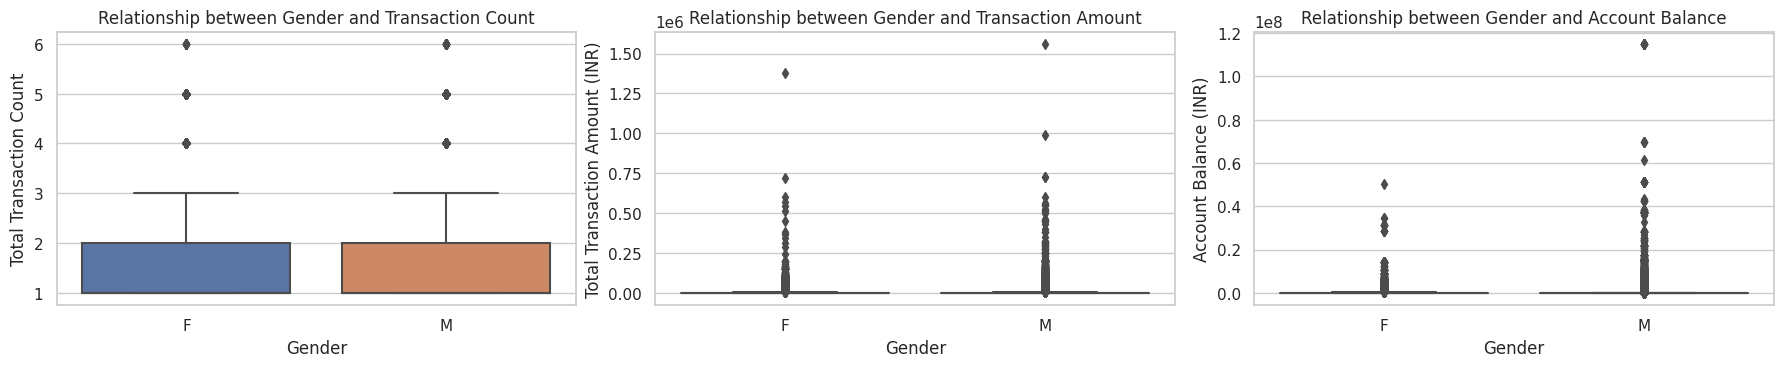

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
# Box plot 1: Transaction count
sns.boxplot(ax=ax[0], x='CustGender', y='TransactionID_total', data=data)
ax[0].set_title('Relationship between Gender and Transaction Count')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Total Transaction Count')

# Box plot 2: Transaction amount
sns.boxplot(ax=ax[1], x='CustGender', y='TransactionAmount (INR)_total', data=data)
ax[1].set_title('Relationship between Gender and Transaction Amount')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Total Transaction Amount (INR)')

# Box plot 3: Account balance
sns.boxplot(ax=ax[2], x='CustGender', y='CustAccountBalance', data=data)
ax[2].set_title('Relationship between Gender and Account Balance')
ax[2].set_xlabel('Gender')
ax[2].set_ylabel('Account Balance (INR)')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

features = data[['Age', 'CustGender', 'CustLocation','CustAccountBalance', 'TransactionYear', 'TransactionID_total', 'TransactionAmount (INR)_total']]

# Retain only the top 100 locations with the highest customer count
top_locations = data['CustLocation'].value_counts().head(100).index
data['CustLocation'] = data['CustLocation'].apply(lambda x: x if x in top_locations else 'Other')

# Apply one-hot encoding and standardization
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'CustAccountBalance', 'TransactionYear', 'TransactionID_total', 'TransactionAmount (INR)_total']),
        ('cat', OneHotEncoder(), ['CustGender', 'CustLocation'])
    ])

# Preprocess the data
cluster_data = preprocessor.fit_transform(features)
#cluster_data_dense = preprocessor.fit_transform(features).toarray()# Convert to dense format to avoid errors
# Use dimensionality reduction technique to reduce data dimensionality
svd = TruncatedSVD(n_components=50)
cluster_data_reduced = svd.fit_transform(cluster_data)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters_kmeans = kmeans.fit_predict(cluster_data_reduced)
data['kmeans_cluster'] = clusters_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data.groupby('kmeans_cluster').mean()

<ipython-input-19-357f3eceef0f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('kmeans_cluster').mean()


,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionYear,TransactionID_total,TransactionAmount (INR)_total,birch_cluster
kmeans_cluster,,,,,,,,
0,102155.045160,157367.389798,1248.653711,37.965176,2012.721501,1.000000,1248.653711,0.001458
1,109663.910406,157283.773170,1985.840904,38.026445,2012.719671,2.194133,3716.221733,0.001784
2,109146.690837,159668.630985,1360.091010,38.237273,1930.505762,1.338431,1861.449431,0.001265


In [ ]:
data.groupby('kmeans_cluster')['CustGender'].value_counts()

kmeans_cluster  CustGender
0               M             193258
                F              74167
1               M              26467
                F               9892
2               M             493922
                F             189168
Name: CustGender, dtype: int64

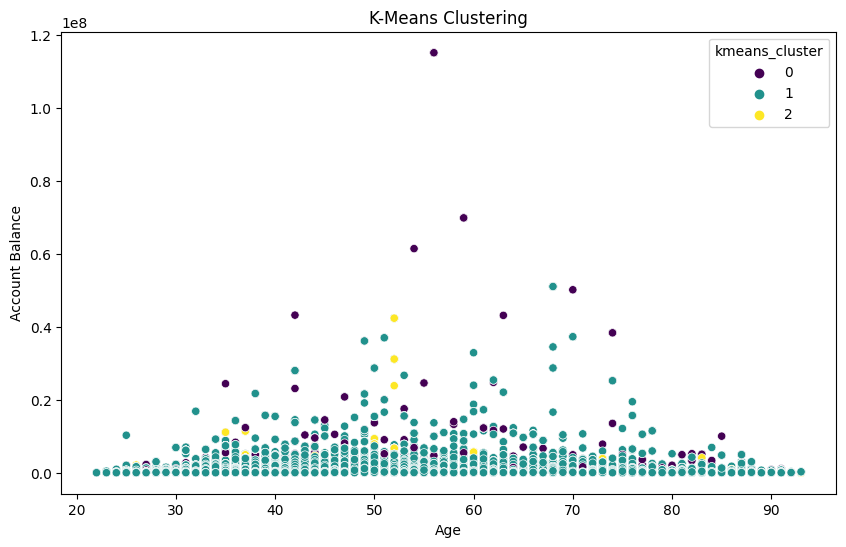

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['CustAccountBalance'], hue=data['kmeans_cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.show()

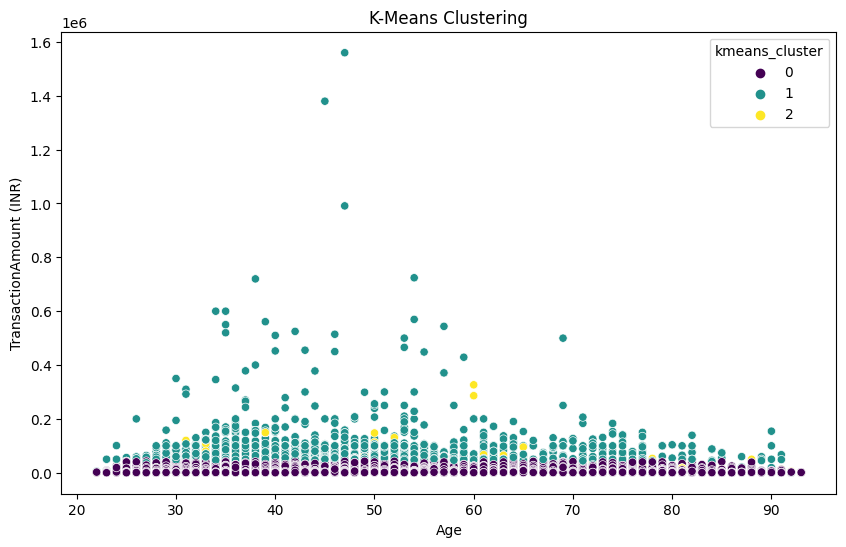

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['TransactionAmount (INR)'], hue=data['kmeans_cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('TransactionAmount (INR)')
plt.show()

In [ ]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039178 sha256=d42b6178109586768a15f63feb9a3514d24c8a8b845541e3c8588638bfc5bbcf
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=15)
labels = clusterer.fit_predict(cluster_data_reduced)
data['hdbscan_cluster'] = labels

In [ ]:
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)#-1：noise points
print("num_clusters:", num_clusters)

num_clusters: 1535


In [ ]:
data.groupby('hdbscan_cluster').mean()

<ipython-input-33-f9dea955c267>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('hdbscan_cluster').mean()


,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionYear,TransactionID_total,TransactionAmount (INR)_total,birch_cluster,kmeans_cluster
hdbscan_cluster,,,,,,,,,
-1,2.941843e+05,158078.956337,3988.321222,42.612734,2011.126675,1.152608,4839.391660,0.004486,0.171366
0,3.714456e+07,133457.349206,2769.481270,68.190476,2007.079365,1.428571,3182.845556,2.000000,0.444444
1,5.530970e+04,155488.176796,782.618122,34.939227,1930.519337,4.000000,3261.849890,0.000000,2.000000
2,1.541384e+07,152722.395161,2065.626774,50.145161,2012.112903,1.201613,2303.128629,2.000000,0.177419
3,5.987402e+04,161826.267806,846.528575,35.689459,1930.490028,3.000000,2538.349259,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...
1530,1.350760e+04,169179.440994,295.358571,36.000000,2021.000000,1.000000,295.358571,0.000000,0.000000
1531,1.252403e+04,158590.401575,314.992047,36.000000,2020.000000,1.000000,314.992047,0.000000,0.000000
1532,1.470385e+04,168074.510753,344.276022,36.000000,2026.000000,1.000000,344.276022,0.000000,0.000000


In [ ]:
data.groupby('hdbscan_cluster')['CustGender'].value_counts()

hdbscan_cluster  CustGender
-1               M             160280
                 F              36112
 0               M                 61
                 F                  2
 1               M                131
                                ...  
 1530            M                161
 1531            M                127
 1532            M                186
 1533            M                152
 1534            M                111
Name: CustGender, Length: 1541, dtype: int64

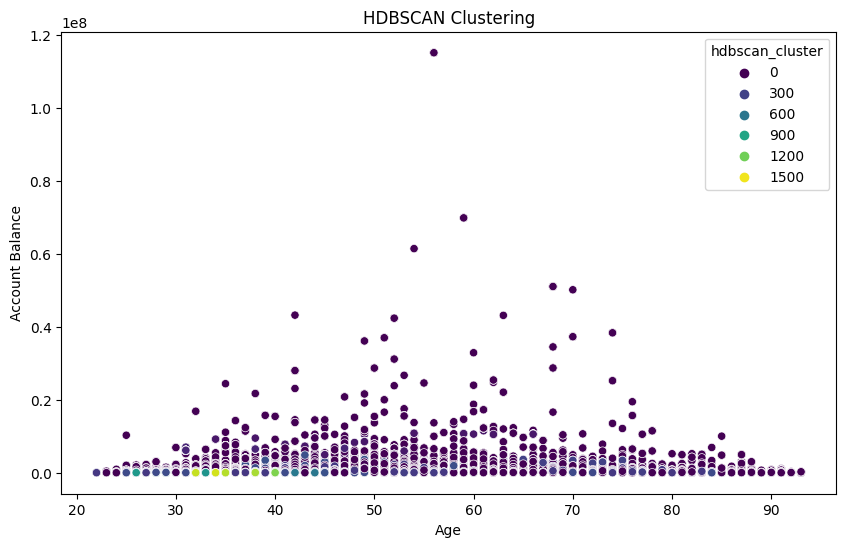

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['CustAccountBalance'], hue=data['hdbscan_cluster'], palette='viridis')
plt.title('HDBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.show()

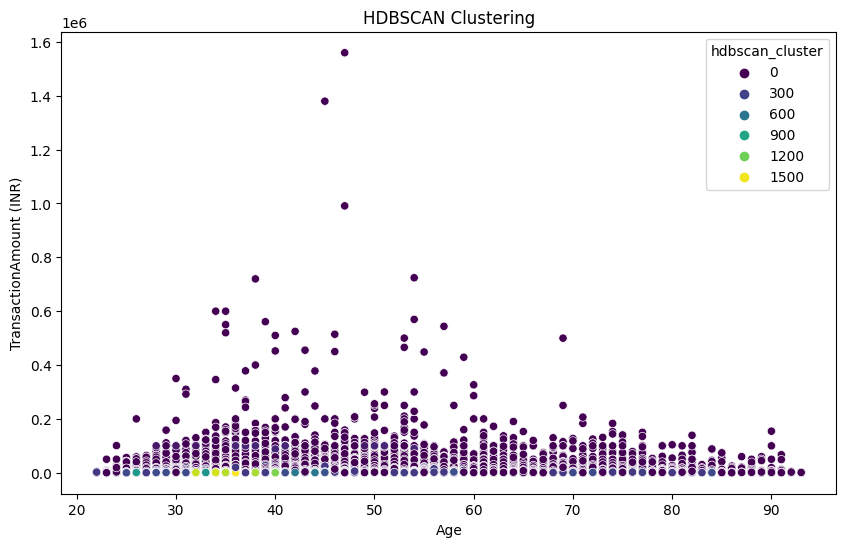

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['TransactionAmount (INR)'], hue=data['hdbscan_cluster'], palette='viridis')
plt.title('HDBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('TransactionAmount (INR)')
plt.show()

In [ ]:
from sklearn.cluster import Birch
birch_clusterer = Birch(n_clusters=3)
clusters_birch = birch_clusterer.fit_predict(cluster_data_reduced)
data['birch_cluster'] = clusters_birch

In [ ]:
data.groupby('birch_cluster').mean()

<ipython-input-14-1f67ad103dc1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('birch_cluster').mean()


,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionYear,TransactionID_total,TransactionAmount (INR)_total
birch_cluster,,,,,,,
0,9.107400e+04,157435.128893,1424.939911,37.980175,2009.691116,1.336058,1905.541388
1,1.145626e+06,158806.225352,334323.520704,43.535211,2010.253521,1.676056,427494.029014
2,1.821674e+07,149648.321823,6377.933343,53.285912,2010.791436,1.301105,6999.278674


In [ ]:
data.groupby('birch_cluster')['CustGender'].value_counts()

birch_cluster  CustGender
0              M             712996
               F             273083
1              M                 57
               F                 14
2              M                594
               F                130
Name: CustGender, dtype: int64

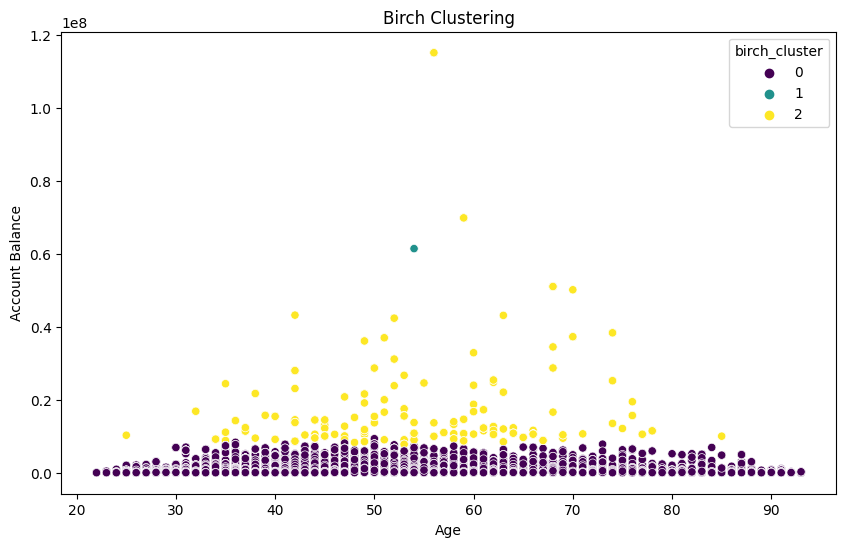

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['CustAccountBalance'], hue=data['birch_cluster'], palette='viridis')
plt.title('Birch Clustering')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.show()

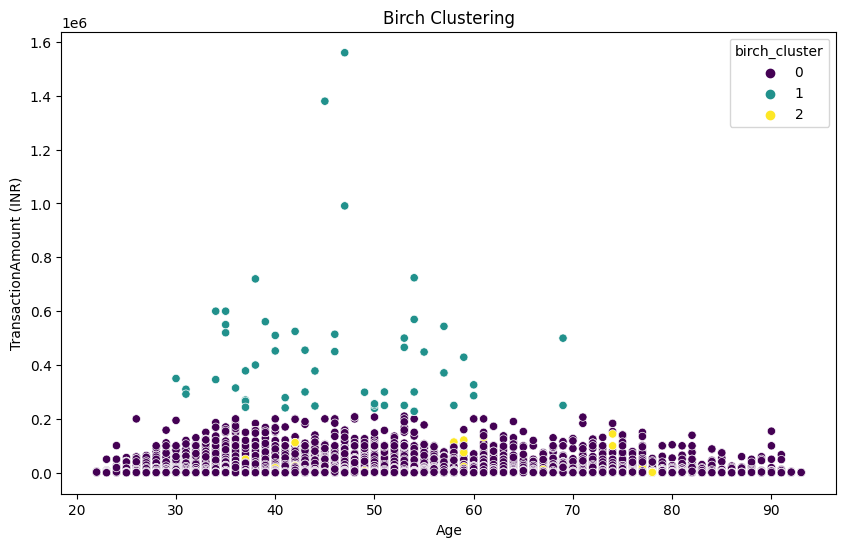

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['TransactionAmount (INR)'], hue=data['birch_cluster'], palette='viridis')
plt.title('Birch Clustering')
plt.xlabel('Age')
plt.ylabel('TransactionAmount (INR)')
plt.show()